### Name : Shivang Gupta
### Roll No : 3055
### Deep Learning Assignment No : 2
### Problem Statement : Implementing Feedforward neural networks with Keras and TensorFlow
#### a. Import the necessary packages
#### b. Load the training and testing data (MNIST/CIFAR10)
#### c. Define the network architecture using Keras
#### d. Train the model using SGD
#### e. Evaluate the network
#### f. Plot the training loss and accuracy

### Importing necessary packages

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

### Load the training and testing data

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255  # the pixel values are scaled to the range [0, 1]
x_test=x_test/255    # data preprocessing step - normalization

### Defining network architecture using Keras

In [3]:
import keras 
model= Sequential()
# The Flatten layer is used to convert the 2D array of 28x28 pixels (representing the grayscale image) into a 1D array of 784 pixels. This is necessary because the subsequent layers in the model expect a 1D input.
model.add(keras.layers.Flatten(input_shape=(28,28))) 
model.add(keras.layers.Dense(128,activation='relu'))  # This line adds a fully connected (Dense) layer to the model-128 neurons
model.add(keras.layers.Dense(10,activation='softmax')) # This line adds a fully connected (Dense) layer to the model-10 neurons

### Training model using SGD

In [4]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"]) # Stochastic Gradient Descent (SGD) updates the model's weights in a way that minimizes the loss function. Loss function: sparse_categorical_crossentropy measures the difference between the true class labels and the predicted class probabilities. Evaluation metric(s) used is accuracy.
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5) # The model will be trained for five epochs. An epoch is one complete pass through the entire training dataset. 

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6480 - accuracy: 0.8370 - val_loss: 0.3590 - val_accuracy: 0.9026
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3402 - accuracy: 0.9048 - val_loss: 0.2970 - val_accuracy: 0.9192
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2913 - accuracy: 0.9184 - val_loss: 0.2643 - val_accuracy: 0.9267
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2597 - accuracy: 0.9277 - val_loss: 0.2397 - val_accuracy: 0.9332
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2359 - accuracy: 0.9343 - val_loss: 0.2215 - val_accuracy: 0.9368


### Evaluating the network

In [5]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.9368
Loss=0.221
Accuracy=0.937


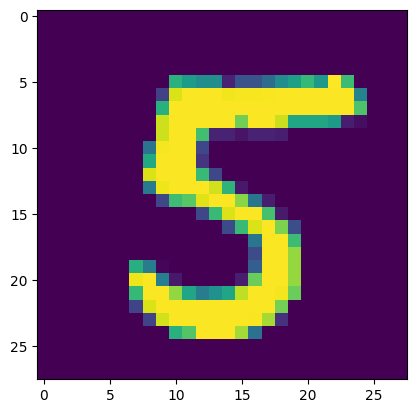

313/313 [==============================] - 1s 4ms/step
The Handwritten number in the image is 5


In [6]:
n=random.randint(0,999)  # This integer is used to select a random image from the test dataset.
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The Handwritten number in the image is %d" % np.argmax(prediction[n]))

### Plot training loss and accuracy

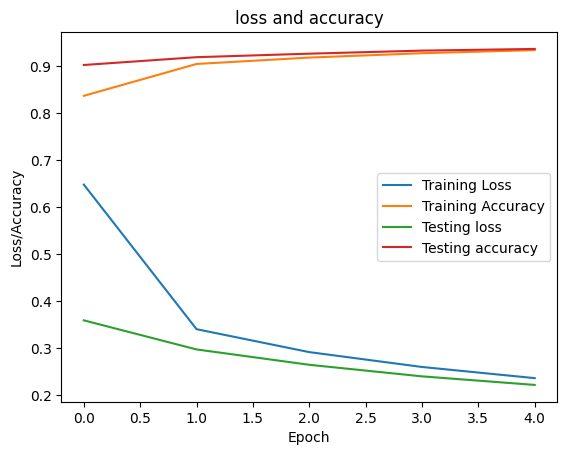

In [7]:
# pd.DataFrame(H.history).plot(figsize=(9,5))
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_loss'])
plt.plot(H.history['val_accuracy'])
plt.title('loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy','Testing loss','Testing accuracy'])
plt.show()

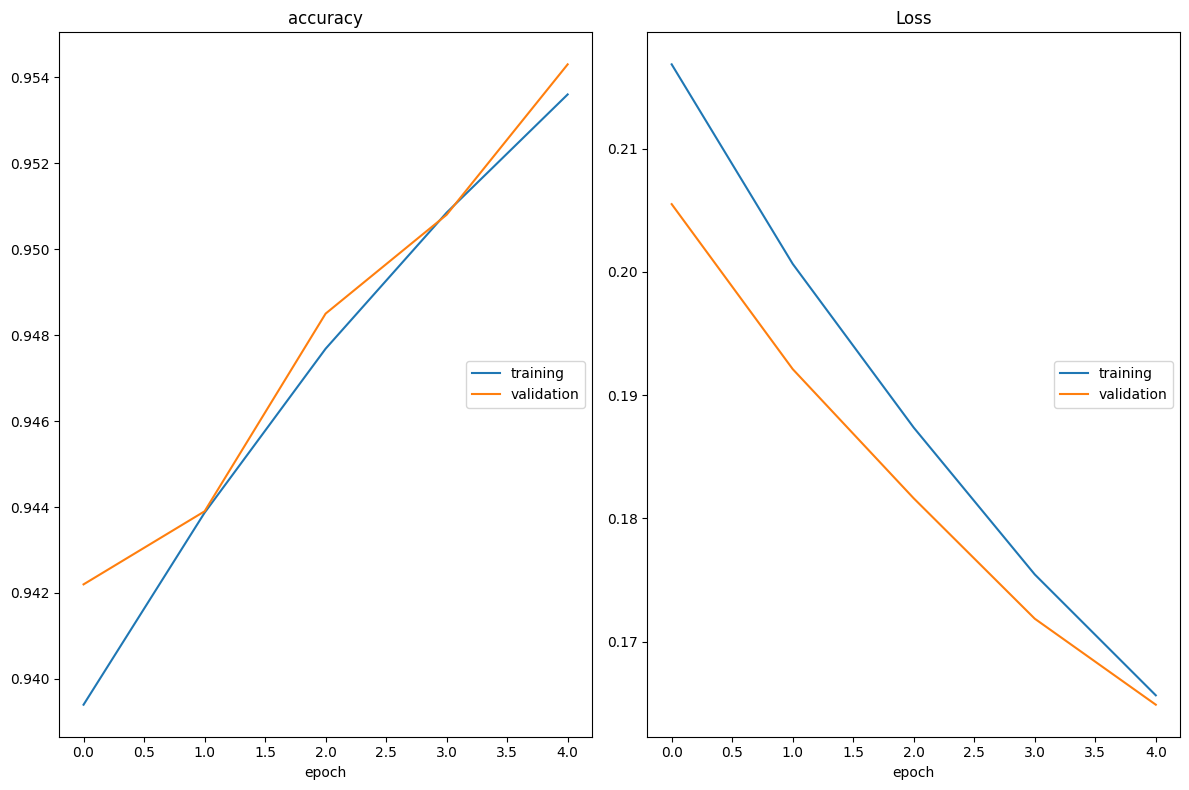

accuracy
	training         	 (min:    0.939, max:    0.954, cur:    0.954)
	validation       	 (min:    0.942, max:    0.954, cur:    0.954)
Loss
	training         	 (min:    0.166, max:    0.217, cur:    0.166)
	validation       	 (min:    0.165, max:    0.205, cur:    0.165)


In [8]:
#Plotting using keras
!pip install livelossplot
from livelossplot import PlotLossesKeras
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,callbacks=[PlotLossesKeras()],verbose=0)